In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("09-iris.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

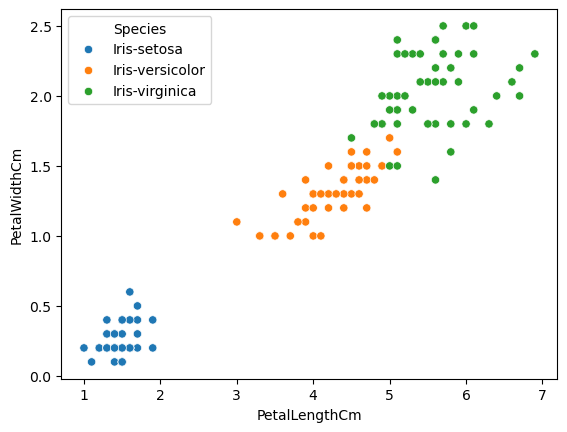

In [6]:
sns.scatterplot(x=df["PetalLengthCm"], y=df["PetalWidthCm"], hue=df["Species"])
plt.show()

In [7]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df = df.drop("Id", axis=1)

In [9]:
X = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].values
y = df["Species"].values

In [10]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [11]:
# we need to encode y labels
# Encode labels (setosa=0, versicolor=1, virginica=2)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [12]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [14]:
# in multiclass classification y type should be long because of cross entropy loss function
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test  = torch.tensor(X_test, dtype=torch.float32)

y_train = torch.tensor(y_train, dtype=torch.long)
y_test  = torch.tensor(y_test, dtype=torch.long)

In [15]:
from torch import nn
class IrisClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(4, 16) # 4 features
        self.layer_2 = nn.Linear(16, 16)
        self.layer_3 = nn.Linear(16, 3)  # 3 classes
        
        self.relu = nn.ReLU() # btw our model may not even need Relu, it looks like a little bit linear but we can leave it here as well

    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

In [16]:
# we can also define this class like this, whatever you want
class IrisClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(4, 16),   # input: 4 features
            nn.ReLU(),          # activation

            nn.Linear(16, 16),  # hidden layer
            nn.ReLU(),          # activation

            nn.Linear(16, 3)    # output: 3 classes → logits
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

In [17]:
model = IrisClassifier()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [18]:
def calculate_accuracy(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() 
    acc = (correct / len(y_pred)) * 100 
    return acc

In [19]:
# prediction probabilities for a multi-class PyTorch model may look like a little bit different

In [20]:
# Perform a single forward pass on the data without training yet
model(X_test)[:5]

tensor([[ 0.0368, -0.2407,  0.3198],
        [ 0.2662, -0.3807,  0.4425],
        [ 0.1530, -0.3087,  0.4053],
        [ 0.1551, -0.3128,  0.4144],
        [ 0.0248, -0.2377,  0.3163]], grad_fn=<SliceBackward0>)

In [21]:
model(X_test)[0].shape

torch.Size([3])

In [22]:
# we get 3 values - because we have 3 classes. we get probabilities for each class 

In [23]:
# so we need to get the most probable one and assign the predicted class as that one
# in binary classification we didn't need to do that since we only had 2 class. if it was greater than 0.5 then we assumed it's 1

In [24]:
y_logits = model(X_test)

# Perform softmax calculation on logits across dimension 1 to get prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1) 
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[ 0.0368, -0.2407,  0.3198],
        [ 0.2662, -0.3807,  0.4425],
        [ 0.1530, -0.3087,  0.4053],
        [ 0.1551, -0.3128,  0.4144],
        [ 0.0248, -0.2377,  0.3163]], grad_fn=<SliceBackward0>)
tensor([[0.3242, 0.2456, 0.4302],
        [0.3681, 0.1928, 0.4391],
        [0.3428, 0.2160, 0.4412],
        [0.3422, 0.2143, 0.4435],
        [0.3218, 0.2475, 0.4307]], grad_fn=<SliceBackward0>)


In [25]:
# it looks like a very close prediction for each class possibility, because we haven't actually trained the model yet
# but they sum up to 1 (100%)

In [26]:
torch.sum(y_pred_probs[0])

tensor(1., grad_fn=<SumBackward0>)

In [27]:
# if i wanted to get the argmax here it would be easy
print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))

tensor([0.3242, 0.2456, 0.4302], grad_fn=<SelectBackward0>)
tensor(2)


In [28]:
epochs = 200

# let's also try to plot loss - accuracy later on (totally optional)
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(epochs):
    ### TRAIN ###
    model.train()
    logits = model(X_train)
    loss = loss_fn(logits, y_train)

    #pred = torch.argmax(logits, dim=1) (we can get preds like this or the line below. cross entropy loss already containts softmax calculation so it won't change the outcome)
    pred = torch.softmax(logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    acc = calculate_accuracy(y_train, pred)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())
    train_accuracies.append(acc)


    ### TEST ###
    model.eval()
    with torch.inference_mode():
        test_logits = model(X_test)
        test_loss = loss_fn(test_logits, y_test)
        test_pred = torch.argmax(test_logits, dim=1)
        test_acc = calculate_accuracy(y_test, test_pred)

    test_losses.append(test_loss.item())
    test_accuracies.append(test_acc)

    if epoch % 20 == 0:
        print(f"Epoch {epoch} | Loss: {loss:.4f} | Acc: {acc:.2f}% | "
              f"Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.2f}%")

Epoch 0 | Loss: 1.1837 | Acc: 33.33% | Test Loss: 1.1363 | Test Acc: 33.33%
Epoch 20 | Loss: 0.6244 | Acc: 66.67% | Test Loss: 0.5868 | Test Acc: 66.67%
Epoch 40 | Loss: 0.2757 | Acc: 96.67% | Test Loss: 0.2643 | Test Acc: 100.00%
Epoch 60 | Loss: 0.1057 | Acc: 97.50% | Test Loss: 0.1038 | Test Acc: 96.67%
Epoch 80 | Loss: 0.0685 | Acc: 96.67% | Test Loss: 0.0663 | Test Acc: 100.00%
Epoch 100 | Loss: 0.0581 | Acc: 97.50% | Test Loss: 0.0536 | Test Acc: 100.00%
Epoch 120 | Loss: 0.0535 | Acc: 98.33% | Test Loss: 0.0472 | Test Acc: 100.00%
Epoch 140 | Loss: 0.0509 | Acc: 98.33% | Test Loss: 0.0444 | Test Acc: 100.00%
Epoch 160 | Loss: 0.0491 | Acc: 98.33% | Test Loss: 0.0435 | Test Acc: 100.00%
Epoch 180 | Loss: 0.0476 | Acc: 98.33% | Test Loss: 0.0435 | Test Acc: 100.00%


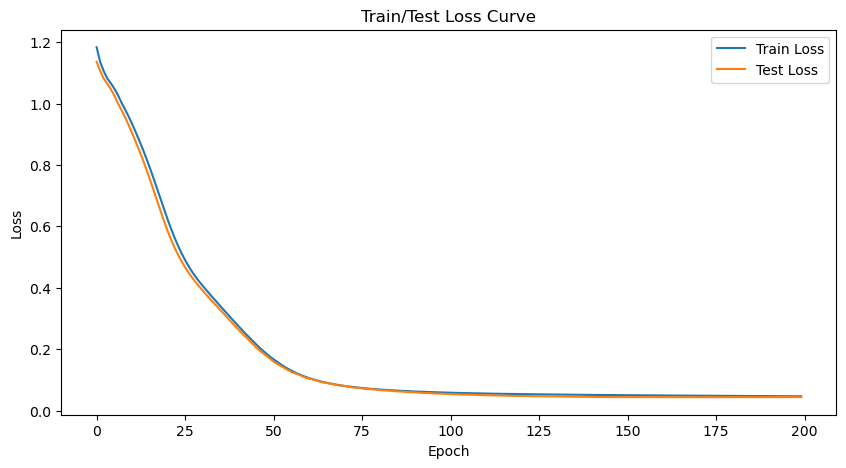

In [29]:
plt.figure(figsize=(10,5))
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train/Test Loss Curve")
plt.legend()
plt.show()

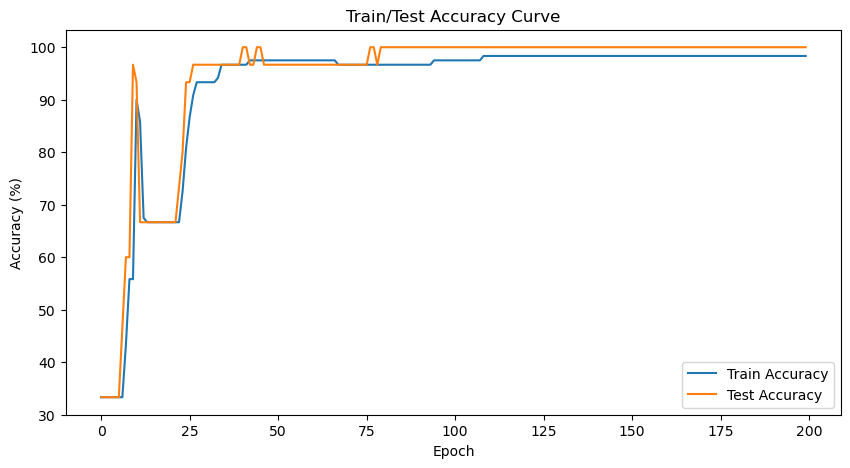

In [30]:
plt.figure(figsize=(10,5))
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(test_accuracies, label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Train/Test Accuracy Curve")
plt.legend()
plt.show()

In [31]:
# let's say we got a new sample flower and try to figure out which class it belongs to

In [32]:
new_sample = np.array([[5.1, 3.5, 1.4, 0.2]]) # 4 features in order

In [33]:
new_sample_tensor = torch.tensor(new_sample, dtype=torch.float32)

In [34]:
model.eval()
with torch.inference_mode():
    logits = model(new_sample_tensor)
    probs = torch.softmax(logits, dim=1)
    predicted_class = torch.argmax(probs, dim=1).item()

In [35]:
predicted_label = le.inverse_transform([predicted_class])[0]

In [36]:
print("Predicted Class Index:", predicted_class)
print("Predicted Species:", predicted_label)

Predicted Class Index: 0
Predicted Species: Iris-setosa


In [37]:
# torchmetrics

•	Accuracy
•	Precision
•	Recall
•	F1-score
•	Confusion Matrix
•	ROC-AUC
•	Multi-class, multi-label, binary etc.
•	GPU comptabile

In [38]:
# we can use torhmetrics for eliminating writing calculate_accuracy functions etc. let's see

In [39]:
#!pip install torchmetrics

In [40]:
from torchmetrics.classification import MulticlassAccuracy

In [41]:
accuracy = MulticlassAccuracy(num_classes=3)

# for example we can write
acc = accuracy(preds=pred, target=y_train).item() * 100

# rather than
pred = torch.softmax(logits, dim=1).argmax(dim=1)

acc = calculate_accuracy(y_train, pred)

In [42]:
# let's do training loop with torchmetrics

In [43]:
epochs = 200
model2 = IrisClassifier()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model2.parameters(), lr=0.01)
for epoch in range(epochs):
    model2.train()
    logits = model2(X_train)
    loss = loss_fn(logits, y_train)

    pred = torch.argmax(logits, dim=1)
    acc = accuracy(pred, y_train).item() * 100

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    ### TEST ###
    model2.eval()
    with torch.inference_mode():
        test_logits = model2(X_test)
        test_loss = loss_fn(test_logits, y_test)
        test_pred = torch.argmax(test_logits, dim=1)
        test_acc = accuracy(test_pred, y_test).item() * 100

    if epoch % 20 == 0:
        print(f"Epoch {epoch} | Loss: {loss:.4f} | Acc: {acc:.2f}% | "
              f"Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.2f}%")

Epoch 0 | Loss: 1.0618 | Acc: 33.33% | Test Loss: 1.0304 | Test Acc: 36.67%
Epoch 20 | Loss: 0.5422 | Acc: 83.33% | Test Loss: 0.5207 | Test Acc: 86.67%
Epoch 40 | Loss: 0.1873 | Acc: 97.50% | Test Loss: 0.1807 | Test Acc: 100.00%
Epoch 60 | Loss: 0.0738 | Acc: 97.50% | Test Loss: 0.0760 | Test Acc: 96.67%
Epoch 80 | Loss: 0.0590 | Acc: 97.50% | Test Loss: 0.0546 | Test Acc: 100.00%
Epoch 100 | Loss: 0.0544 | Acc: 98.33% | Test Loss: 0.0468 | Test Acc: 100.00%
Epoch 120 | Loss: 0.0519 | Acc: 98.33% | Test Loss: 0.0448 | Test Acc: 100.00%
Epoch 140 | Loss: 0.0501 | Acc: 98.33% | Test Loss: 0.0409 | Test Acc: 100.00%
Epoch 160 | Loss: 0.0486 | Acc: 98.33% | Test Loss: 0.0453 | Test Acc: 100.00%
Epoch 180 | Loss: 0.0474 | Acc: 98.33% | Test Loss: 0.0449 | Test Acc: 100.00%


In [44]:
from torchmetrics.classification import MulticlassConfusionMatrix

In [45]:
cm = MulticlassConfusionMatrix(num_classes=3)
matrix = cm(test_pred, y_test)

In [46]:
print(matrix)

tensor([[10,  0,  0],
        [ 0, 10,  0],
        [ 0,  0, 10]])


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Predicted class', ylabel='True class'>)

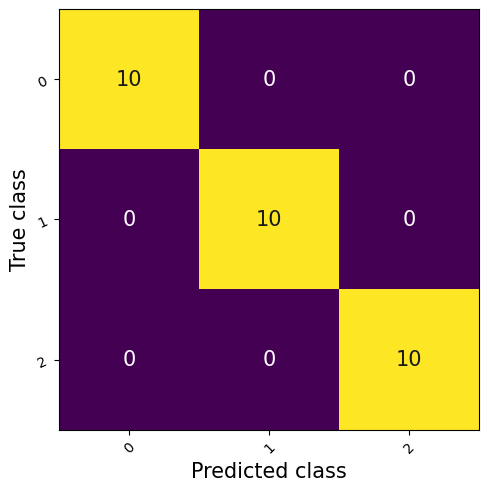

In [47]:
from torchmetrics.utilities.plot import plot_confusion_matrix
plot_confusion_matrix(matrix)